# Building an Effective Trading Screener with Python and Tradingview

Trading screeners are indispensable tools for traders and investors seeking opportunities in the vast financial markets. By applying specific criteria and indicators to filter through a multitude of instruments, we can uncover potential trades with higher probabilities of success.

To accomplish this, we will leverage the `tradingview_ta` library, a powerful Python library that provides access to a wide range of updated and popular indicators used by traders worldwide. This ensures that we stay ahead of the game by incorporating the latest market insights into our screening process. We'll also utilize the `yfinance` library to effortlessly download historical quotes for our selected instruments. This enables us to have a solid foundation of historical data for comprehensive analysis and testing.

In this article, we will focus on a practical application using Argentine ADRs (American Depositary Receipts). However, it's important to note that the principles and techniques we explore can be applied to a wide range of instruments available on Tradingview. Whether you're interested in stocks, futures, ETFs, cryptocurrencies, or any other tradable asset, this screener can adapt to your needs.

In the first part we create a graph where we can visually see how many technical indicators give purchase or sale for each of the analyzed actions. Then, in a second section, we download the detail of each of the technical indicators to filter and search for trading opportunities in specific assets.

### 1. Import libraries

We will import essential libraries such as pandas, numpy, tradingview_ta, yfinance, mplfinance, datetime and matplotlib. These libraries will enable us to handle data, perform screeners, visualize results, and create plots. 

In [1]:
# import the libraries that we going to use for the analysis
import pandas as pd
import numpy as np
from tradingview_ta import TA_Handler, Interval, Exchange
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

### 2. Define stocks list

In the code snippet provided, we have a list of ticker symbols representing various Argentine ADRs (American Depositary Receipts). ADRs are stocks of foreign companies that trade on U.S. exchanges, allowing investors to gain exposure to international markets without the need to directly purchase shares on foreign exchanges.

By including these ticker symbols in our code, we are essentially creating a watchlist or a set of instruments that we want to analyze using our trading screener. These tickers will serve as the basis for retrieving historical price data, applying indicators, and ultimately screening for potential trading opportunities.

In [2]:
Country = "UK"
if (Country != "UK"):
    screener = "america"
    first_exch = "NYSE"
    second_exch = "NASDAQ"
else:
    screener = "uk"
    first_exch = "LSE"
    second_exch = "LSIN"
    

In [3]:

if (Country != "UK"):
    table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    df = table[0]['Symbol']
    df.to_csv('S&P500-Info.csv')
    df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])
else:
    table=pd.read_html('https://en.wikipedia.org/wiki/FTSE_250_Index')
    df = table[2]['Ticker']

tickers = df.values.tolist()

print(len(tickers))
print(tickers)



250
['3IN', 'FOUR', '888', 'ASL', 'ABDN', 'APEO', 'ATST', 'ATT', 'APAX', 'ASCL', 'ASHM', 'AGR', 'AML', 'ATG', 'AGT', 'BAB', 'BGFD', 'BAKK', 'BCPT', 'BBY', 'BCG', 'BNKR', 'BGEO', 'BAG', 'BBGI', 'AJB', 'BBH', 'BWY', 'BHMG', 'BYG', 'BRGE', 'BRSC', 'THRG', 'BRWM', 'BSIF', 'BOY', 'BREE', 'BPT', 'BLND', 'BVIC', 'BYIT', 'CCR', 'CABP', 'CLDN', 'CGT', 'CCL', 'CEY', 'CWR', 'CHG', 'CTY', 'CKN', 'CBG', 'CLI', 'COA', 'CCC', 'CWK', 'CRST', 'CURY', 'DARK', 'DLN', 'DGI9', 'DLG', 'DSCV', 'DEC', 'DOM', 'DWL', 'DRX', 'DOCS', 'DNLM', 'EZJ', 'EDIN', 'EWI', 'ELM', 'ESP', 'ENOG', 'ESNT', 'EOT', 'ESCT', 'FDM', 'FXPO', 'FCSS', 'FEML', 'FEV', 'FSV', 'FGT', 'FGP', 'FSG', 'FSFL', 'FUTR', 'GAW', 'GCP', 'GEN', 'GNS', 'GSCT', 'GFTU', 'GRI', 'GPE', 'UKW', 'GRG', 'HMSO', 'HBR', 'HVPE', 'HAS', 'HTWS', 'HSL', 'HRI', 'HGT', 'HICL', 'HILS', 'HFG', 'SONG', 'HSX', 'HTG', 'IBST', 'ICGT', 'IGG', 'IEM', 'INCH', 'INDV', 'IHP', 'ICP', 'IDS', 'INPP', 'INVP', 'IPO', 'ITH', 'ITV', 'IWG', 'JLEN', 'JMAT', 'JAM', 'JMG', 'JEDT', 'JGGI'

### 3. Retrieve data

In this step, we are retrieving data for each ticker symbol in the tickers list. We iterate through the list and perform the following actions for each ticker:

We create an instance of the TA_Handler class from the tradingview_ta library. This handler allows us to interact with TradingView's technical analysis functionalities.

Also, we specify the parameters for the TA_Handler instance:

+ symbol: The ticker symbol for which we want to retrieve data.
+ screener: The region or exchange from which we want to fetch data. In this case, we set it to "america" to focus on American stocks.
+ exchange: The specific stock exchange where the ticker is listed. We initially search for data on the NYSE (New York Stock Exchange).
+ interval: The time interval of the data we want to retrieve. Here, we set it to "1d" for daily data.

We use the get_analysis().summary method to retrieve a summary of the technical analysis for the specified ticker. This summary contains various indicators and metrics calculated based on historical price data. Then, we append the retrieved data for the ticker to the tickers_data list.

If an exception occurs during the retrieval process, indicating that no data is found for the ticker on the NYSE, we handle the exception and search for the data on the NASDAQ (NASDAQ Stock Market), which is another popular U.S. stock exchange.

Finally, we print a message indicating that the data has been successfully imported.

By executing this code, we gather technical analysis data for each ticker from the specified stock exchanges. This data will later be used for applying indicators, screening for trading opportunities, and generating insights in our trading screener.

In [4]:
tickers_data = []

# Iterate through each ticker
for ticker in tickers:

    try:
        # Retrieve data for the ticker from NYSE
        print(ticker,screener,first_exch)
        data = TA_Handler(
            symbol=ticker,
            screener=screener,
            exchange=first_exch,
            interval="1d"
        )
        data = data.get_analysis().summary
        tickers_data.append(data)
        
    except Exception as e:
        # If no data is found for the ticker in NYSE, search in NASDAQ
        print(f"No data found for ticker {ticker} in NYSE. Searching in NASDAQ...")
        try:
            data = TA_Handler(
                symbol=ticker,
                screener=screener,
                exchange=second_exch,
                interval="1d"
            )
            data = data.get_analysis().summary
            tickers_data.append(data)

        except Exception as e2:
            tickers_data.append({'RECOMMENDATION': 'BUY', 'BUY': 0, 'SELL': 0, 'NEUTRAL': 0})
            print("removed ",ticker)
            tickers.remove(ticker)


print("Data successfully imported.")
print("tickers",len(tickers))
print("tickers_data",len(tickers_data))


3IN uk LSE
FOUR uk LSE
888 uk LSE
ASL uk LSE
ABDN uk LSE
APEO uk LSE
ATST uk LSE
ATT uk LSE
APAX uk LSE
ASCL uk LSE
ASHM uk LSE
AGR uk LSE
AML uk LSE
ATG uk LSE
AGT uk LSE
BAB uk LSE
BGFD uk LSE
BAKK uk LSE
BCPT uk LSE
BBY uk LSE
BCG uk LSE
BNKR uk LSE
BGEO uk LSE
BAG uk LSE
BBGI uk LSE
AJB uk LSE
BBH uk LSE
BWY uk LSE
BHMG uk LSE
BYG uk LSE
BRGE uk LSE
BRSC uk LSE
THRG uk LSE
BRWM uk LSE
BSIF uk LSE
BOY uk LSE
BREE uk LSE
BPT uk LSE
BLND uk LSE
BVIC uk LSE
BYIT uk LSE
CCR uk LSE
CABP uk LSE
CLDN uk LSE
CGT uk LSE
CCL uk LSE
CEY uk LSE
CWR uk LSE
CHG uk LSE
CTY uk LSE
CKN uk LSE
CBG uk LSE
CLI uk LSE
COA uk LSE
CCC uk LSE
CWK uk LSE
CRST uk LSE
CURY uk LSE
DARK uk LSE
DLN uk LSE
DGI9 uk LSE
DLG uk LSE
DSCV uk LSE
DEC uk LSE
DOM uk LSE
DWL uk LSE
DRX uk LSE
DOCS uk LSE
DNLM uk LSE
EZJ uk LSE
EDIN uk LSE
EWI uk LSE
ELM uk LSE
ESP uk LSE
ENOG uk LSE
ESNT uk LSE
EOT uk LSE
ESCT uk LSE
FDM uk LSE
FXPO uk LSE
FCSS uk LSE
FEML uk LSE
FEV uk LSE
FSV uk LSE
FGT uk LSE
FGP uk LSE
FSG uk LSE
FSFL

After retrieving the data for all the tickers, we proceed to process and analyze it to extract the relevant information in order to create a plot with buy, sell and neutral indicators. 

### 4. Process data

We iterate through each element in the tickers_data list, which contains the analyzed data for each ticker. We extract the specific information we need, such as the recommendation, buy, sell, and neutral values, and store them in separate lists.

We then create a dictionary called data to organize the extracted information, associating it with the corresponding ticker symbol. This dictionary is used to create a Pandas DataFrame called df, where each column represents a specific piece of information: Ticker, Recommendations, Buys, Sells, and Neutrals.

In [5]:
recommendations = []
buys = []
sells = []
neutrals = []

# Iterate through each data in tickers_data
for data in tickers_data:
    recommendation = data.get('RECOMMENDATION')
    buy = data.get('BUY')
    sell = data.get('SELL')
    neutral = data.get('NEUTRAL')
    
    recommendations.append(recommendation)
    buys.append(buy)
    sells.append(sell)
    neutrals.append(neutral)

data = {
    'Ticker': tickers,
    'Recommendations': recommendations,
    'Buys': buys,
    'Sells': sells,
    'Neutrals': neutrals
}


df = pd.DataFrame(data)

To establish an order for the recommendations, we define a dictionary called order_categories, which assigns numerical values to each category. The Order column is created in the DataFrame by mapping the values from the Recommendations column to the corresponding categories in the order_categories dictionary. The DataFrame is then sorted based on the Order column in ascending order, ensuring a logical order of the recommendations.

Finally, the Order column is dropped from the DataFrame since it is no longer needed, and the sorted DataFrame is displayed, presenting the information in a tabular format.

By processing and analyzing the data in this manner, we can gain valuable insights into the recommendations and categorizations for each ticker, aiding us in making informed trading decisions.

In [6]:
# Define the order of categories
order_categories = {
    'STRONG_BUY': 5,
    'BUY': 4,
    'NEUTRAL': 3,
    'SELL': 2,
    'STRONG_SELL': 1
}

# Assign a numerical value to each category in a new column "Order"
df['Order'] = df['Recommendations'].map(order_categories)
df = df.sort_values('Order', ascending=True).reset_index(drop=True)

# Drop the "Order" column if not needed in the final output
df = df.drop('Order', axis=1)

# Display the sorted dataframe
df

,Ticker,Recommendations,Buys,Sells,Neutrals
0,WWH,STRONG_SELL,1,16,9
1,SOI,STRONG_SELL,1,16,9
2,BBGI,STRONG_SELL,0,17,9
3,NESF,STRONG_SELL,1,16,9
4,MYI,STRONG_SELL,1,16,9
...,...,...,...,...,...
242,MTO,STRONG_BUY,16,1,9
243,ICP,STRONG_BUY,17,1,8
244,UKCM,STRONG_BUY,17,0,9
245,WPS,STRONG_BUY,16,1,9


### 5. Plot the data

We can visually represent the recommendations through a horizontal bar plot using Matplotlib. This allows us to display the buy, sell, and neutral signals for each ticker in a clear and intuitive manner.

In the code snippet, we start by defining the colors for the bars, background, and text elements to create an appealing visual style. Then, we create the figure and axes objects, specifying the size of the plot. The background color of the plot is set to enhance the overall presentation.

Annotations are included to specify the recommendation for each ticker. These annotations appear adjacent to the corresponding bar, providing additional context. The horizontal grid lines are removed to declutter the plot and focus attention on the essential elements.

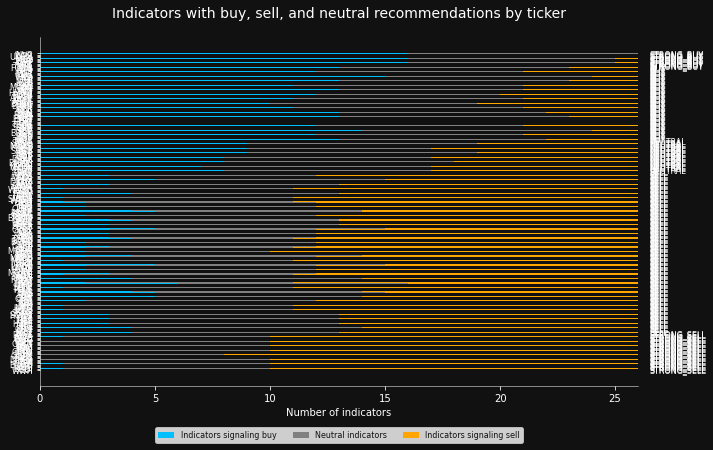

In [7]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#111111')
ax.set_facecolor('#111111')

# Add the horizontal bars for buys, neutrals, and sells
ax.barh(df.index, df["Buys"], height=0.25, color='#00BFFF', label='Indicators signaling buy')
ax.barh(df.index, df["Neutrals"], height=0.25, color='#808080', label='Neutral indicators', left=df["Buys"])
ax.barh(df.index, df["Sells"], height=0.25, color='#FFA500', label='Indicators signaling sell', left=df["Buys"] + df["Neutrals"])

# Set the axes labels
ax.set_yticks(df.index)
ax.set_yticklabels(df["Ticker"], fontsize=8, color='white')
ax.set_xlabel('Number of indicators', fontsize=10, color='white')

# Add title with larger font size and additional spacing
ax.set_title('Indicators with buy, sell, and neutral recommendations by ticker', fontsize=14, color='white', pad=20)

# Add the annotations
for i, recommendation in enumerate(df["Recommendations"]):
    ax.annotate(recommendation, xy=(25, i), xytext=(26.5, i),
                color='white', fontsize=8, va='center', ha='left')

# Remove the horizontal grid lines
ax.yaxis.grid(False)

# Configure the tick and axis styles
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust the spacing
plt.tight_layout()

# Set the text color of the legend to white
legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.175), ncol=3, fontsize=8)
for text in legend.get_texts():
    text.set_color('#111111')

# Display the plot
plt.show()


### Section 2: Unveiling Trading Opportunities through Indicator Filtering

While the collective signals offer a broad perspective, our approach goes beyond surface-level analysis. In the second section, we leverage the power of technical indicators by diving deeper into their individual details. We download and analyze the specific data points for each indicator, enabling us to apply advanced filtering techniques.

In the first step, we involve importing technical indicator data for a list of stock tickers from either the NYSE or NASDAQ exchange and storing it in a pandas DataFrame called df_adrs_indicators. The code iterates over each ticker, attempts to retrieve the indicator data from the NYSE, and if it fails, searches for the data in the NASDAQ. The retrieved data is then concatenated with the existing DataFrame. Finally, the column names are converted to strings, and a success message is printed. This process allows for the consolidation of technical indicator data for multiple stocks, enabling further analysis and identification of trading opportunities.

In [8]:
df_adrs_indicators = pd.DataFrame()

for ticker in tickers:
    try:
        data = TA_Handler(
            symbol=ticker,
            screener=screener,
            exchange=first_exch,
            interval="1d"
        )
        data = data.get_analysis().indicators

    except Exception as e:
        print(f"No data found for ticker {ticker} in NYSE. Searching in NASDAQ...")
        try:
            data = TA_Handler(
                symbol=ticker,
                screener=screener,
                exchange=second_exch,
                interval="1d"
            )
            data = data.get_analysis().indicators
        except Exception as e2:
            print("removed ",ticker)
            tickers_data.remove(ticker)
            
    df_temp = pd.DataFrame(data, index=[ticker])
    df_adrs_indicators = pd.concat([df_adrs_indicators, df_temp])

df_adrs_indicators.columns = df_adrs_indicators.columns.astype(str)
print("Data successfully imported.")

Data successfully imported.


As a result we obtain the dataframe df_adrs_indicators. It has 91 columns with information on many technical indicators, extremely useful information to filter the assets according to the criteria that we consider relevant.

In [9]:
df_adrs_indicators

,Recommend.Other,Recommend.All,Recommend.MA,RSI,RSI[1],Stoch.K,Stoch.D,Stoch.K[1],Stoch.D[1],CCI20,...,Pivot.M.Demark.R1,open,P.SAR,BB.lower,BB.upper,AO[2],volume,change,low,high
3IN,0.181818,0.290909,0.400000,53.922535,51.642837,51.449275,46.376812,46.376812,38.882422,7.739786,...,311.000000,305.50,294.850000,296.318187,316.781813,-4.095681,460031,0.490196,305.4456,309.0000
FOUR,0.090909,0.512121,0.933333,51.831840,51.010779,43.941265,36.866927,35.820965,33.959140,-81.116656,...,5522.024400,4750.00,5255.080115,4896.998119,5206.679641,-16.420557,5890,0.332889,4750.0000,5100.0000
888,-0.181818,-0.424242,-0.666667,29.866391,32.659737,8.463534,7.165777,9.037863,6.137104,-84.000038,...,116.366600,94.00,96.339998,81.356540,129.973458,-21.785856,4015185,-3.554377,89.1500,94.7500
ASL,0.000000,-0.400000,-0.800000,43.285061,43.983759,16.512717,10.299809,10.321668,6.421586,-96.899443,...,1277.460000,1193.16,1234.403389,1167.778640,1266.978870,-24.477538,67603,-0.202751,1184.0000,1196.1466
ABDN,0.181818,0.157576,0.133333,56.238596,51.615483,71.557114,56.275544,58.246424,41.742371,147.459884,...,161.124000,159.75,151.019000,149.792205,163.527799,-3.738479,4980565,1.866252,159.7500,164.6500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMWH,-0.181818,-0.490909,-0.800000,36.039094,39.008786,16.367265,17.239148,20.359281,16.766352,-92.535345,...,1438.000000,1297.00,1233.000000,1223.664292,1429.535708,-113.894812,135270,-1.795472,1255.0000,1297.0000
WTAN,-0.090909,-0.245455,-0.400000,48.674210,50.080270,42.650825,29.819443,30.592396,18.708686,-54.120824,...,234.500000,219.50,225.858258,215.945694,233.245306,-3.748247,493488,-0.263982,219.5000,223.0000
WIZZ,0.000000,-0.466667,-0.933333,36.561969,36.995787,30.497925,38.130856,40.107408,41.075365,-130.611213,...,2104.000000,1817.00,1952.450000,1779.290858,2045.109142,-171.051960,126009,-0.355191,1800.0000,1833.0000
WKP,0.000000,-0.266667,-0.533333,48.224735,41.338971,26.180775,20.051701,18.482893,15.883174,-49.841276,...,504.300005,476.40,492.740704,452.374531,521.485472,-24.809704,53885,2.297872,467.0000,481.2000


In [10]:
df_adrs_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 3IN to WWH
Data columns (total 91 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Recommend.Other           247 non-null    float64
 1   Recommend.All             247 non-null    float64
 2   Recommend.MA              247 non-null    float64
 3   RSI                       247 non-null    float64
 4   RSI[1]                    247 non-null    float64
 5   Stoch.K                   247 non-null    float64
 6   Stoch.D                   247 non-null    float64
 7   Stoch.K[1]                247 non-null    float64
 8   Stoch.D[1]                247 non-null    float64
 9   CCI20                     247 non-null    float64
 10  CCI20[1]                  247 non-null    float64
 11  ADX                       247 non-null    float64
 12  ADX+DI                    247 non-null    float64
 13  ADX-DI                    247 non-null    float64
 14  ADX+DI[1]    

For example, once we have imported the technical indicator data into the df_adrs_indicators DataFrame, we can proceed to filter the stocks based on specific criteria. In this code snippet, we apply multiple filters to identify stocks that meet certain conditions.

First, we filter stocks that have their Exponential Moving Average (EMA) 10-day value crossing above their EMA 20-day value. This is done by creating a new DataFrame called df_filtered using the condition df_adrs_indicators['EMA10'] > df_adrs_indicators['EMA20'].

Next, we further narrow down the selection by filtering for stocks with a Relative Strength Index (RSI) value above 75. The df_filtered DataFrame is updated with this condition: df_filtered[df_filtered['RSI'] > 75.

Subsequently, we apply a filter for stocks with a positive Moving Average Convergence Divergence (MACD), specifically when the MACD line crosses above the signal line. The df_filtered DataFrame is again updated with the condition: df_filtered[df_filtered['MACD.macd'] > df_filtered['MACD.signal']].

Lastly, we filter for stocks with an Average Directional Index (ADX) above 30, indicating a strong trend. The df_filtered DataFrame is updated with the final condition: df_filtered[df_filtered['ADX'] > 30.

In [13]:
# Filter stocks with EMA crossing SMA
df_filtered = df_adrs_indicators[df_adrs_indicators['EMA10'] > df_adrs_indicators['EMA20']]

# Filter stocks with RSI above 70 (overbought)
#df_filtered = df_filtered[df_filtered['RSI'] < 50]

# Filter stocks with positive MACD (signal line crossover)
df_filtered = df_filtered[df_filtered['MACD.macd'] > df_filtered['MACD.signal']]

# Filter stocks with ADX above a certain threshold (indicating a strong trend)
df_filtered = df_filtered[df_filtered['ADX'] > 30]

# Print the stocks that meet the criteria
filtered_shares = df_filtered.index.to_list()

print('Shares filtered:', filtered_shares)

Shares filtered: ['APAX', 'ASCL', 'ESNT', 'SYNC']


We can also observe the price movements of the filtered shares using mplfinance, a Python library that provides a high-level interface for creating financial charts and visualizations. It is built on top of the popular Matplotlib library and offers a convenient way to generate candlestick charts, line plots, bar plots, and other financial plot types.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


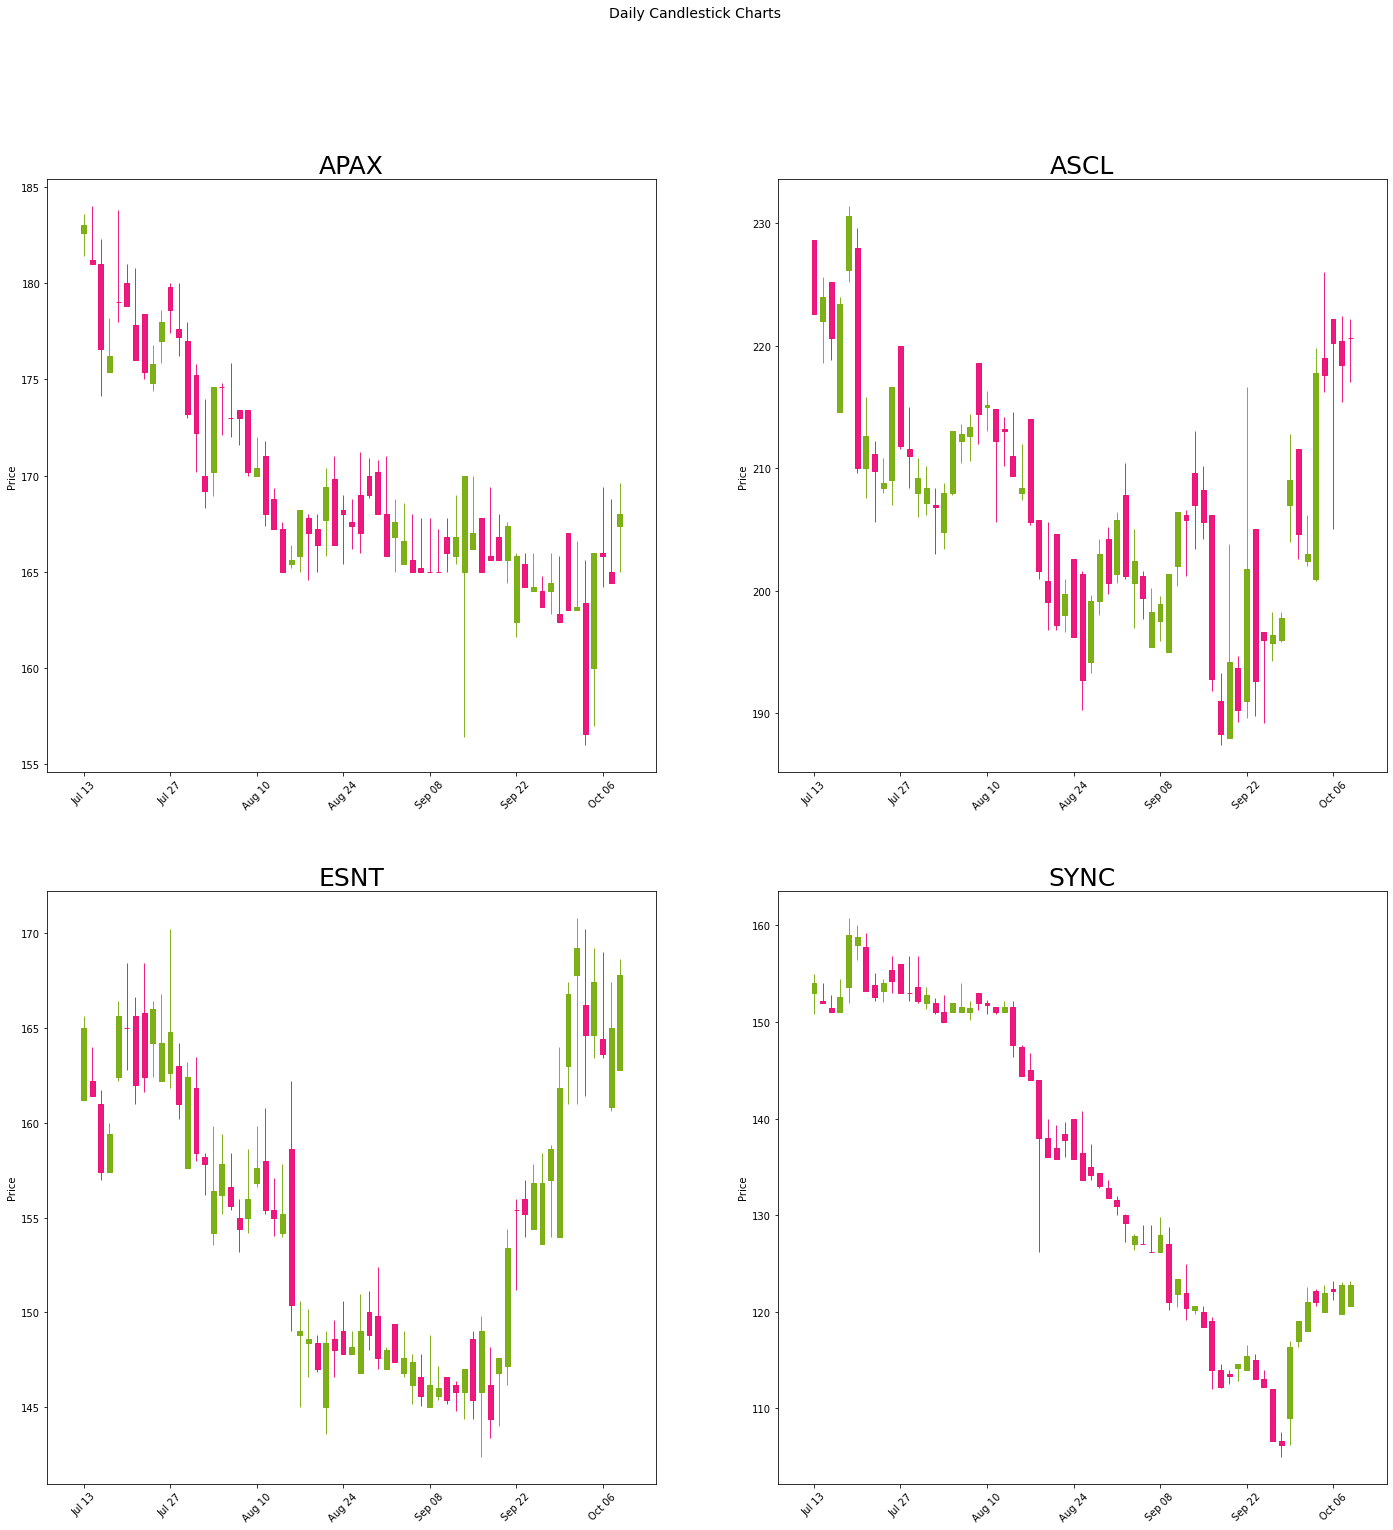

In [14]:
# Get the current date
end_date = datetime.now().strftime("%Y-%m-%d")

# Calculate the start date (3 months ago from today)
start_date = (datetime.now() - timedelta(days=3 * 30)).strftime("%Y-%m-%d")

# Calculate the number of rows and columns based on the desired layout
num_rows = (len(filtered_shares) + 1) // 2
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 24))
fig.suptitle("Daily Candlestick Charts", fontsize=14)

# Iterate over each stock and add a subplot for each one
for i, symbol in enumerate(filtered_shares):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Get historical data from Yahoo Finance
    if (Country != "UK"):
        data = yf.download(symbol, start=start_date, end=end_date)
    else:
        data = yf.download(symbol+".L", start=start_date, end=end_date)
        
    colors = ['g' if v >= 0 else 'r' for v in data["Close"]]
    mpf.plot(data, type='candle', style="binance", ax=axes[row, col], volume=False, show_nontrading=False)
   
    # Set the title of the subplot
    axes[row, col].set_title(symbol,fontsize=25)

# Adjust the spacing between subplots
#plt.tight_layout()

# Show the plot
plt.show()